# Chapter 1. Probability and Counting

In [68]:
import math
from numpy.random import randint

# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Example 1.4.8: Birthday Problem

### Problem: 
There are $k$ people in a room. Assume each person’s birthday is equally likely to be any of the $365$ days of the year (we exclude February 29), and that people’s birthdays are independent (we assume there are no twins in the room). What is the probability that two or more people in the group have the same birthday?

### Solution:

There are $365^k$ ways to assign birthdays to the people in the room (_cardinatlity_ of the sample space, $|S|=365^k$), since we can imagine the $365$ days of the year being sampled $k$ times, with replacement. By assumption, all of these possibilities are equally likely, so the naive definition of probability applies.

Instead, let’s count the complement: the number of ways to assign birthdays to $k$ people such that no two people share a birthday. This amounts to sampling the $365$ days of the year without replacement, so the number of possibilities is
$365 \times 364 \times 363 · · · (365−k +1); k \leq 365$. Therefore the probability of no birthday matches in a group of $k$ people is

$$P(\mbox{no birthday match}) = \frac{365 \times 364 \ldots (365 − k + 1)}{365^k} $$

and the probability of at least one birthday match is

$$P(\mbox{at least 1 birthday match}) = 1 - \frac{365 \times 364 \ldots (365 − k + 1)}{365^k}.$$

In [69]:
# for example, k = 3
p_nomatch = math.perm(365, 3) / 365**3
print('P(no birthday match) = {:.2%}'.format(p_nomatch))
print('P(at least 1 match) = {:.2%}'.format(1 - p_nomatch))

P(no birthday match) = 99.18%
P(at least 1 match) = 0.82%


Chart the probability of at least one birthday match as a function of $k$; $k = 1 \ldots 100$ 

In [70]:
k = [i for i in range(1, 101)]
P = [1 - (math.perm(365, k)/365**k) for k in range(1, 101)]
df = pd.DataFrame(data = list(zip(k, P)), columns=['k', 'Probability'])
df[:10]

,k,Probability
0,1,0.000000
1,2,0.002740
2,3,0.008204
3,4,0.016356
4,5,0.027136
5,6,0.040462
6,7,0.056236
7,8,0.074335
8,9,0.094624
9,10,0.116948


In [71]:
df['mid']=0.5

<AxesSubplot:xlabel='k'>

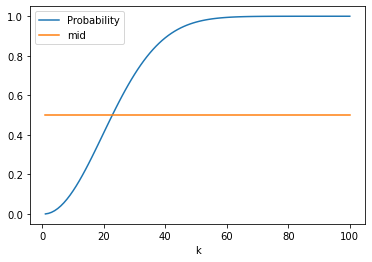

In [72]:
df.plot(x='k', y=['Probability','mid'], kind='line')

Thus, in a group of 23 people, there is a better than 50% chance that two or more of them will have the same birthday. By the time we reach $k = 57$. the probability of a match exceeds 99%.

In [73]:
print("P(23) = {:.2%}".format(df[df.k==23].iloc[0]['Probability']))
print("P(57) = {:.2%}".format(df[df.k==57].iloc[0].Probability))

P(23) = 50.73%
P(57) = 99.01%


### Simulate the scenarios
Default simulation generates a sample set of birthdays for $k=23$ people for $n=10^4$ iterations.

In [74]:
def birthdays(k = 23, n = 10**4):
    return sum([int(np.bincount(randint(1, 365, k)).max() > 1) for n in range(n)]) / n

In [75]:
print("In a group of 23 people, there is a {:.2%} chance that two or more of them will share the same birthday.".format(birthdays()))
print("In a group of 57 people, there is a {:.2%} chance that two or more of them will share the same birthday.".format(birthdays(57)))

In a group of 23 people, there is a 51.14% chance that two or more of them will share the same birthday.
In a group of 57 people, there is a 99.15% chance that two or more of them will share the same birthday.


## The Envelope Problem

A group of _n_ people receives _n_ envelopes with their names on them --- but someone has completely mixed up the envelopes! Find the probability that at least one person will receive the proper envelope.

Let $A_i$: Person _i_ receives the correct envelope. $$P(A) = P(A_1 \cup A_2 \ldots \cup A_n)$$

Which becomes a classic inclusion-exclusion problem

## Poker Problems

### 2 pairs

- Select 2 ranks, can do this $\binom{13}{2}$ ways
- Select 2 suits for the first pair, $\binom{4}{2}$ ways
- Select 2 suits for the second pair, $\binom{4}{2}$ ways
- Select remaining cards, 52 minus 2 ranks (8 cards) = 44 ways

$$|\mbox{2 pairs}| = \binom{13}{2}\binom{4}{2}\binom{4}{2}44$$

$$P(\mbox{2 pairs}) = \frac{|\mbox{2 pairs}|}{\binom{52}{5}} $$

In [76]:
cardinal_2pr = math.comb(13,2) * math.comb(4,2) * math.comb(4,2) * 44
print("There are {0:,} ways to arrange 2 pairs".format(cardinal_2pr))
cardinal_5cards = math.comb(52,5)
print("There are {:,} ways to pick 5 cards".format(cardinal_5cards))
prob_2pr = cardinal_2pr/ cardinal_5cards
print("P(2 pairs) = {:,.4%}".format(prob_2pr))

There are 123,552 ways to arrange 2 pairs
There are 2,598,960 ways to pick 5 cards
P(2 pairs) = 4.7539%


### Full house (1 pair + 3-of-a-kind)
- select 2 _ordered ranks_, because the triple and the pair are distinct, i.e. $P_{13,2}$ ways
- select 2 suits for the pair, $\binom{4}{2}$ ways
- select 3 suits for the 3-of-a-kind, $\binom{4}[3} ways

$$|\mbox{full house}| = P_{13,2} \cdot \binom{4}{2} \binom{4}{3}$$
$$ P(\mbox{full house}) = \frac{|\mbox{full house}|}{\binom{52}{5}} $$

In [77]:
cardinal_fh = math.perm(13,2) * math.comb(4,2) * math.comb(4,3)
print("There are {0:,} ways to get a full house".format(cardinal_fh))
prob_fh = cardinal_fh/ cardinal_5cards
print("P(fullhouse) = {:,.4%}".format(prob_fh))

There are 3,744 ways to get a full house
P(fullhouse) = 0.1441%


### Flush (all 5 cards of the same suit, _all inclusive_)
- select a suit $\binom{4}{1}$ ways
- select 5 cards fron that suit, $\binom{13}{5}$ ways
$$P
(\mbox{flush}) = \frac{\binom{4}{1}\binom{13}{5}}{\binom{52}{5}}
$$

In [78]:
cardinal_fl = math.comb(4,1) * math.comb(13,5)
print("There are {0:,} ways to get a flush".format(cardinal_fl))
prob_fl = cardinal_fl / cardinal_5cards
print("P(flush) = {:,.4%}".format(prob_fl))

There are 5,148 ways to get a flush
P(flush) = 0.1981%


### Straight (5 ranks in a row, includes all straights)
* select a starting point: (A, 2, 3, ... 10), i.e. $\binom{10}{1}$ ways
* select a suit for each card, $4^5$ ways

$$
P(\mbox{straigh}) = \frac{\binom{10}{1} \cdot 4^5}{\binom{52}{5}}
$$

In [79]:
cardinal_st = math.comb(10,1) * 4**5
print("There are {0:,} ways to get a stright".format(cardinal_st))
prob_st = cardinal_st / cardinal_5cards
print("P(straight) = {:,.4%}".format(prob_st))

There are 10,240 ways to get a stright
P(straight) = 0.3940%


### Straight Flush (straight within a same suit)
- select a starting point as it was for the straight, $\binom{10}{1} ways
- select a suit, 4 ways
$$
P(\mbox{straight flush}) = \frac{\binom{10}{1} \cdot 4}{\binom{52}{5}}
$$

In [80]:
cardinal_sf = math.comb(10,1) * 4
print("There are {0:,} ways to get a straight flush".format(cardinal_sf))
prob_sf = cardinal_sf / cardinal_5cards
print("P(straight flush) = {:,.6%}".format(prob_sf))

There are 40 ways to get a straight flush
P(straight flush) = 0.001539%
